Abstrak

Tumor otak dianggap sebagai salah satu penyakit agresif, di kalangan anak-anak dan orang dewasa. Tumor otak menyumbang 85 hingga 90 persen dari semua tumor Sistem Saraf Pusat (SSP) primer. Setiap tahun, sekitar 11.700 orang didiagnosis menderita tumor otak. Tingkat kelangsungan hidup 5 tahun untuk orang dengan otak kanker atau tumor SSP adalah sekitar 34 persen untuk pria dan 36 persen untuk wanita. Tumor Otak diklasifikasikan sebagai: Tumor Jinak, Tumor Ganas, Tumor Hipofisis, dll. Perawatan yang tepat, perencanaan, dan diagnostik yang akurat harus diterapkan untuk meningkatkan harapan hidup pasien. Teknik terbaik untuk mendeteksi tumor otak adalah Magnetic Resonance Imaging (MRI). Sejumlah besar data gambar dihasilkan melalui pemindaian. Gambar-gambar ini diperiksa oleh ahli radiologi. Pemeriksaan manual dapat rawan kesalahan karena tingkat kompleksitas yang terlibat dalam tumor otak dan sifat-sifatnya.


Context

Tumor otak sangat kompleks. Ada banyak kelainan dalam ukuran dan lokasi tumor otak (s). Hal ini membuat sangat sulit untuk memahami sifat tumor. Juga, seorang ahli bedah saraf profesional diperlukan untuk analisis MRI. Sering kali di negara-negara berkembang kurangnya dokter yang terampil dan kurangnya pengetahuan tentang tumor membuatnya sangat menantang dan memakan waktu untuk menghasilkan laporan dari MRI '. 

Load Modules

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Load and prepare data

In [54]:
# Mengakses direktori dan mengambil file yang ada didalamnya
# Kamus (classes) untuk memberikan label numerik yang akan digunakan dalam pelatihan model

import os

path = os.listdir('brain_tumor/Training/') 
classes = {'no_tumor':0, 'pituitary_tumor':1} 

In [55]:
# Memproses setiap gambar dalam setiap kelas tumor otak dalam direktori 'brain_tumor/Training/', 
# mengubahnya menjadi skala keabuan, mengubah ukurannya menjadi 200x200 piksel, dan menyimpannya dalam daftar X. 
# Label numerik yang sesuai dengan setiap gambar ditambahkan ke daftar Y.

import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

Data Analysis

In [57]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [58]:
# Kita dapat melihat nilai-nilai unik yang terdapat dalam larik Y. 
# Misalnya, jika terdapat dua kelas 'no_tumor' dan 'pituitary_tumor', 
# maka np.unique(Y) akan mengembalikan array dengan dua elemen, yaitu [0, 1].

np.unique(Y)

array([0, 1])

In [59]:
# Melihat frekuensi masing-masing kelas dalam larik Y. 
# Hasilnya akan berupa objek Series yang menunjukkan jumlah kemunculan setiap nilai kelas dalam larik Y

pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [60]:
# (jumlah gambar, tinggi, lebar)
# (jumlah gambar, vector)

X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

Data Visualization

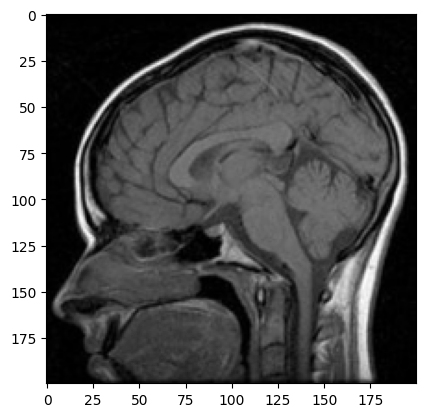

In [61]:
plt.imshow(X[0], cmap='gray')

Prepare data

In [63]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

Split Data

Pada langkah ini, kita akan membagi data menjadi dua bagian (pelatihan dan pengujian), sehingga kita dapat melatih model kita pada dataset pelatihan dan menguji akurasinya pada data (uji) yang tidak terlihat.

In [65]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [66]:
# jumlah data dan panjang vector

xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

Feature Scalling

Pada langkah ini, kita akan menggunakan teknik penskalaan minmax untuk membawa semua nilai fitur menjadi kurang dari atau sama dengan 1. Untuk melakukannya, kami telah membagi data pelatihan dengan nilai maksimumnya.

In [67]:
# normalisasi untuk pengolahan citra memastikan data berada dalam rentang yang sesuai untuk pelatihan model

print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


Feature Selection: PCA (Principal Component Analysis) adalah suatu teknik analisis statistik yang digunakan untuk mengurangi dimensi dari data yang kompleks.

Dengan menggunakan PCA, dimensi data dapat dikurangi, sehingga memudahkan visualisasi dan analisis data yang lebih sederhana. Selain itu, PCA juga dapat membantu dalam menghilangkan fitur yang kurang informatif atau redundan, meningkatkan efisiensi komputasi, dan mengidentifikasi hubungan linier antara variabel dalam data.

In [68]:
from sklearn.decomposition import PCA

In [69]:
# ingin mempertahankan 98% dari variansi data yang ada

print(xtrain.shape, xtest.shape)

pca = PCA(.98)
#pca_train = pca.fit_transform(xtrain)
#pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [17]:
#print(pca_train.shape, pca_test.shape)
#print(pca.n_components_)
#print(pca.n_features_)

Model Training

Seperti yang telah kita lakukan dengan bagian preprocessing, sekarang saatnya untuk melatih model. Kita akan melatih model menggunakan SVM (Support Vector Machine) dan algoritma Regresi Logistik dan kemudian kita akan membandingkan kinerja kedua model yang berbeda ini.

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Regresi logistik adalah alat yang berguna dalam analisis prediksi dan pemodelan untuk kasus-kasus di mana variabel target adalah biner atau kategorikal.

In [71]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

Algoritma SVM (Support Vector Machine) adalah sebuah metode pembelajaran mesin yang digunakan untuk klasifikasi dan regresi. Tujuannya adalah untuk mencari sebuah hyperplane (bidang pemisah) dalam ruang fitur yang optimal untuk memisahkan dua kelas data atau untuk memprediksi nilai regresi.

In [72]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

Evaluation

Pada bagian ini, kita akan membandingkan skor dari dua model di atas.

In [73]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9510204081632653


In [74]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9918116683725691
Testing Score: 0.9591836734693877


Prediction

Seperti yang dapat kita amati, SVM menunjukkan keseimbangan yang besar antara pelatihan skor pengujian dibandingkan dengan Regresi Logistik. Jadi kita dapat mencapai kesimpulan bahwa ini adalah model ideal untuk dataset khusus ini

In [75]:
pred = sv.predict(xtest)


In [76]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  1,   3,  12,  35,  83, 125, 137, 147, 169, 205]),)

In [77]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  10
1 1


Testing 

In [78]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

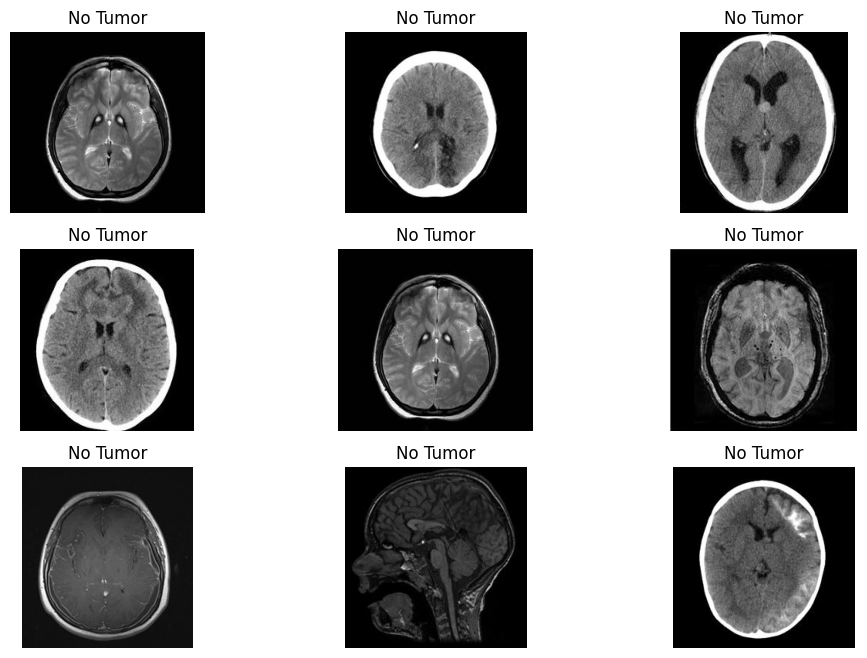

In [79]:
# Melakukan perulangan melalui 9 gambar pertama dan menampilkan setiap gambar 4x4
# sv. untuk memprediksi label dari setiap gambar dan menambahkan judul dengan label prediksi tersebut.
# Gambar ditampilkan dalam skala abi-abu

plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

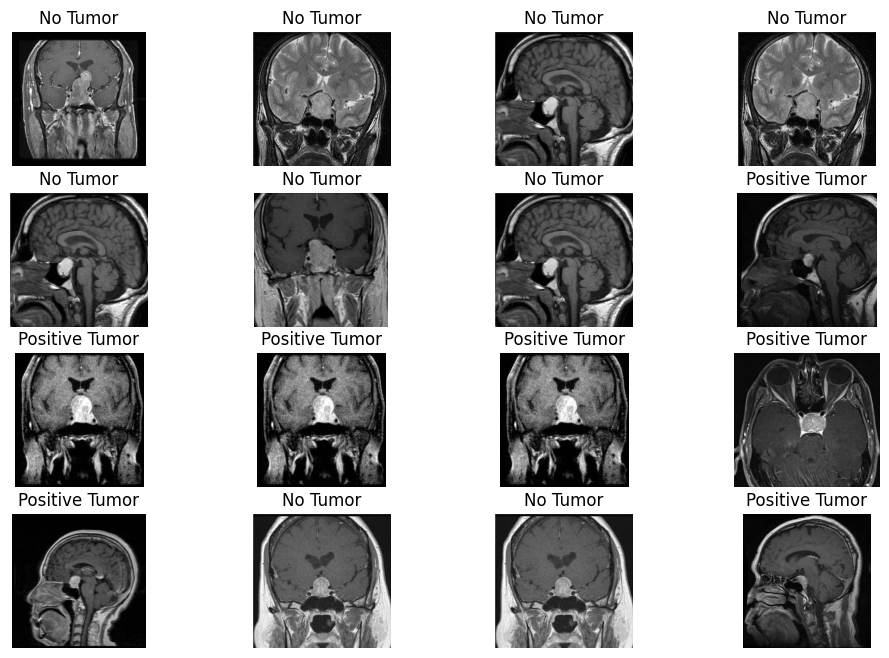

In [80]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1